In [2]:
from albumentations import *
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import imgviz

In [13]:
def get_aug(p=1):
    return Compose([
        RandomSizedCrop(min_max_height=[80, 240], height=256, width=256, p=p),
    ])

def save_colored_mask(save_path, mask):
    lbl_pil = Image.fromarray(mask.astype(np.uint8), mode="P")
    colormap = imgviz.label_colormap()
    lbl_pil.putpalette(colormap.flatten())
    lbl_pil.save(save_path)

msk_path = r"F:\WarehouseOfRui\FYP\Cropped_imgs\MASKS\0_test.png"
img_path = r"F:\WarehouseOfRui\FYP\Cropped_imgs\MASKS\1.jpg"

# img_path = r"F:\WarehouseOfRui\FYP\Cropped_imgs\TestForAug\0.jpg"
# msk_path = r"F:\WarehouseOfRui\FYP\Cropped_imgs\TestForAug\0.png"

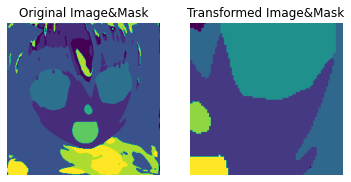

In [15]:
image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
mask = np.asarray(Image.open(msk_path), dtype=np.int32)
# mask是使用调色板模式保存的 所以读取方式一定不能错

augmente = get_aug()
augmented = augmente(image=image, mask=mask)
img, msk = augmented['image'], augmented['mask']

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image,vmin=0,vmax=255)
plt.imshow(mask.squeeze(), alpha=1)
plt.axis('off')
plt.title("Original Image&Mask")

plt.subplot(1, 2, 2)
plt.imshow(img,vmin=0,vmax=255)
plt.imshow(msk.squeeze(), alpha=1)
plt.axis('off')
plt.title("Transformed Image&Mask")
plt.subplots_adjust(wspace=None, hspace=None)

In [43]:
import imageio

imageio.imsave(r'F:\WarehouseOfRui\FYP\Cropped_imgs\TestForAug\1-aug1.jpg', img)
save_colored_mask(r'F:\WarehouseOfRui\FYP\Cropped_imgs\TestForAug\1-aug1.png', msk)

The part below will be used as the visualization of all the augmentation strategies that will be used in the augmentation process.

In [10]:
def get_aug_rotate90(p=1):
    return Compose([
        Rotate(90, p=p),
    ])

def get_aug_rotate_min90(p=1):
    return Compose([
        Rotate(-90, p=p),
    ])

def get_aug_shift_rotate(p=1):
    return Compose([
        ShiftScaleRotate(p=p),
    ])

def get_aug_ver_flip(p=1):
    return Compose([
        VerticalFlip(p=p),
    ])

def get_aug_hor_flip(p=1):
    return Compose([
        HorizontalFlip(p=p),
    ])

def get_aug_random_crop(p=1):
    return Compose([
        RandomSizedCrop(min_max_height=[80, 240], height=256, width=256, p=p),
    ])

def get_aug_transpose(p=1):
    return Compose([
        Transpose(p=p),
    ])

def get_aug_grid_dis(p=1):
    return Compose([
        GridDistortion(p=p),
    ])

def get_aug_pixel_drop(p=1):
    return Compose([
            PixelDropout(dropout_prob=0.1, p=p),
    ])

def get_aug_crop_nonempty(p=1):
    return Compose([
        CropNonEmptyMaskIfExists(height=200, width=200, p=p),
    ])

def get_aug_elastic_trans(p=1):
    return Compose([
        ElasticTransform(sigma=0.5, p=p),
    ])

In [11]:
aug_rotate90        = get_aug_rotate90()
aug_rotate_min90    = get_aug_rotate_min90()
aug_shift_rotate    = get_aug_shift_rotate()
aug_ver_flip        = get_aug_ver_flip()
aug_hor_flip        = get_aug_hor_flip()
aug_random_crop     = get_aug_random_crop()
aug_transpose       = get_aug_transpose()
aug_grid_dis        = get_aug_grid_dis()
aug_pixel_drop      = get_aug_pixel_drop()
aug_crop_nonempty   = get_aug_crop_nonempty()
aug_elastic_trans = get_aug_elastic_trans()

aug_name_dic = {
               aug_rotate90      :"Rotate90",
               aug_rotate_min90  :"Rotate-90",
               aug_shift_rotate  :"ShiftScaleRotate",
               aug_ver_flip      :"VerticalFlip",
               aug_hor_flip      :"HorizontalFlip",
               aug_random_crop   :"RandomSizedCrop",
               aug_transpose     :"Transpose",
               aug_grid_dis      :"GridDistortion",
               aug_pixel_drop    :"PixelDropout",
               aug_crop_nonempty :"CropNonEmptyMaskIfExists",
               aug_elastic_trans :"ElasticTransform",
                }

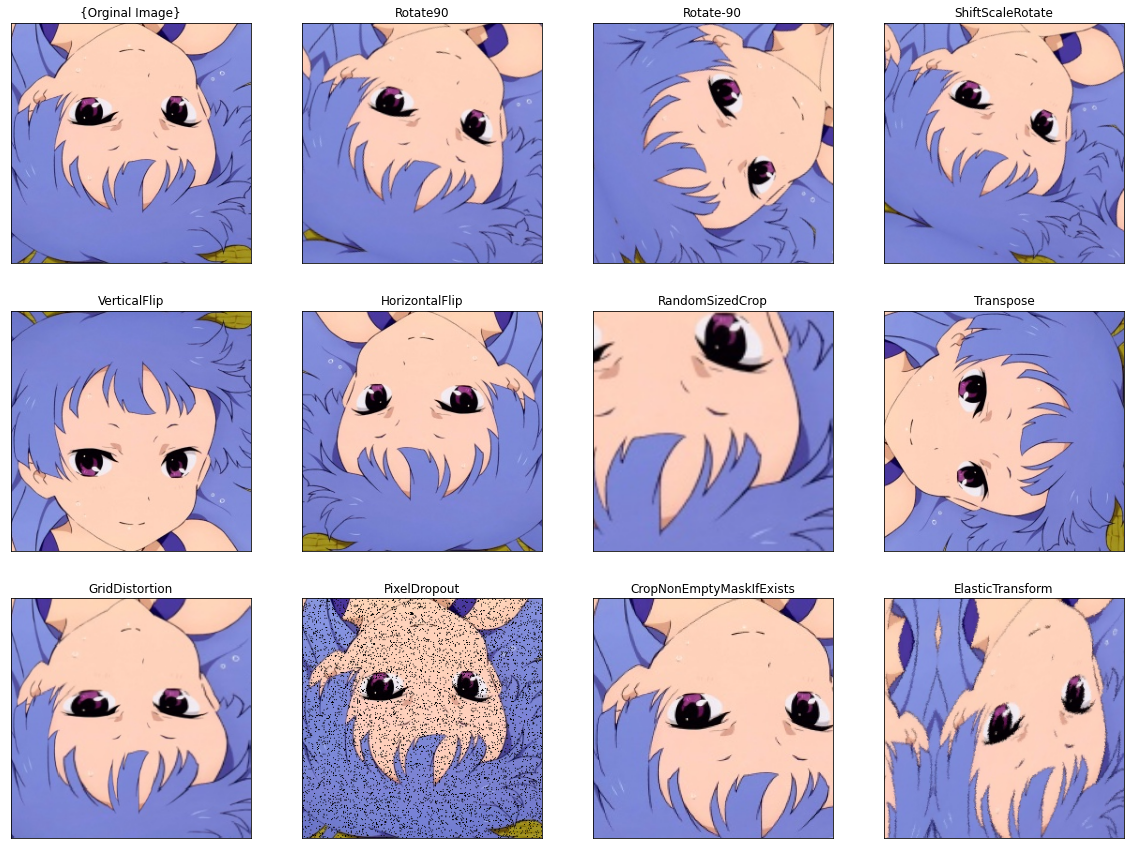

In [34]:
idx = 2
msk_li = []; msk_dic = {}

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(3, 4, 1, xticks=[], yticks=[])
ax.set_title("{Orginal Image}",ha='center') #设置title
plt.imshow(image)

for tech, name in aug_name_dic.items():
    tech_now = tech
    augmented = tech_now(image=image, mask=mask)
    img, msk = augmented['image'], augmented['mask']

    msk_dic[idx - 2] = name
    msk_li.append(msk)

    ax = fig.add_subplot(3, 4, idx, xticks=[], yticks=[]) #3行4列，坐标为空
    ax.set_title("{}".format(name),ha='center') #设置title
    # plt.tight_layout() #紧密布局
    idx = idx + 1
    plt.imshow(img)

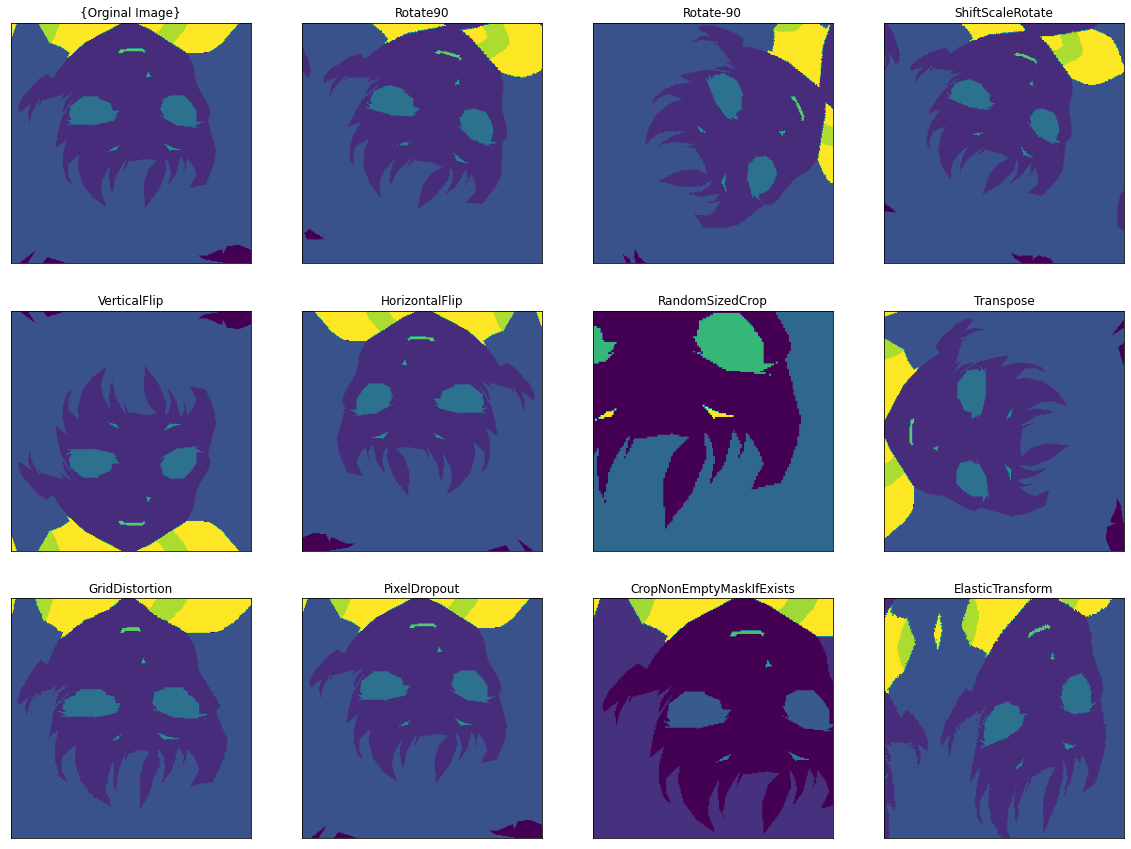

In [35]:
idx = 2
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(3, 4, 1, xticks=[], yticks=[])
ax.set_title("{Orginal Image}",ha='center') #设置title
plt.imshow(mask.squeeze())

for msk_idx, name in msk_dic.items():
    ax = fig.add_subplot(3, 4, idx, xticks=[], yticks=[]) #3行4列，坐标为空
    ax.set_title("{}".format(name),ha='center') #设置title
    # plt.tight_layout() #紧密布局
    plt.imshow(msk_li[msk_idx].squeeze())
    idx = idx + 1